<a href="https://colab.research.google.com/github/jere1882/DL_IADS22/blob/main/CNN_DogsVsCats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dogs vs. Cats - Overview

In this notebook I will play with the well-known cats vs dogs dataset

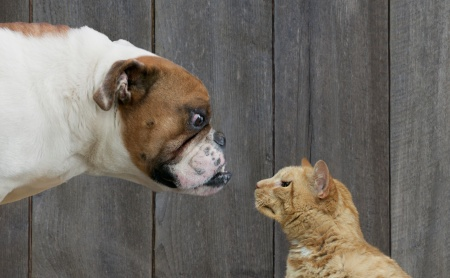

The list of experiments goes as follows:

0. Downoad, preprocess and visualize the images
1. Simple CNN (VGG architecture)
2. Augment data by rotating, shifting images + add dropout
3. Visualising predictions and failures
4. The power of just having more data :)

# Downoad, preprocess and visualize the images


This is how I got a kaggle key, for future reference:
1. Login to [Kaggle](https://www.kaggle.com/) or Register if you don't have account
2. Open Dataset (https://www.kaggle.com/c/dogs-vs-cats/rules) and accept terms and condition. 
3. On the top right corner click on your Icon and go to accounts and press a button "Create New API Token". It will download a JSON file containing your username and key. 
4. Now, paste both below. 

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "jeremiasrodriguez" # username from the json file
os.environ['KAGGLE_KEY'] = "b81fac449d3308d9d95af582e38968fe" # key from the json file
!kaggle competitions download -c dogs-vs-cats # api copied from kaggle (https://www.kaggle.com/c/dogs-vs-cats/data)

100% 809M/812M [00:05<00:00, 160MB/s]
100% 812M/812M [00:05<00:00, 150MB/s]


In order to run this using Keras ImageDataGenerator class and flow_from_directory() API, we need move the data so that is sits in the following directories:

```
dataset_dogs_vs_cats
├── test
│   ├── cats
│   └── dogs
├── validation
│   ├── cats
│   └── dogs
└── train
    ├── cats
    └── dogs
```



In [2]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/dogs-vs-cats.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()

with ZipFile("/content/train.zip", 'r') as zip:
  zip.extractall()

with ZipFile("/content/test1.zip", 'r') as zip:
  zip.extractall()
  
# Get all the paths
data_dir_list = os.listdir('/content/train')
path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)

# Create new base directory
original_dataset_dir = '/content/train'
base_dir = '/content/cats_and_dogs_medium'
os.mkdir(base_dir)

In [3]:
# Create directories for the rest of the data
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [4]:
n_train      = 2000
n_validation = 500
n_test       = 500

import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(n_train)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(n_train, n_train+n_validation)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(n_train+n_validation, n_train+n_validation+n_test)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(n_train)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(n_train, n_train+n_validation)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(n_train+n_validation, n_train+n_validation+n_test)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [5]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 2000
total training dog images: 2000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


Dog samples


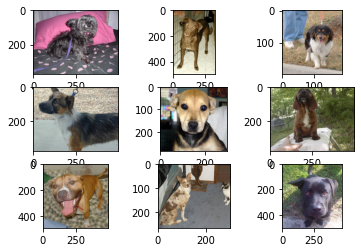

Cat samples


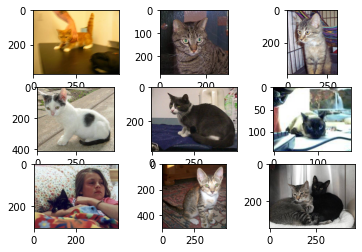

In [6]:
# Plot a couple of samples
from matplotlib import pyplot
from matplotlib.image import imread

print("Dog samples")
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = train_dogs_dir + '/dog.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

print("Cat samples")
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = train_cats_dir + '/cat.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

### Use ImageDataGenerator to read images from directories

Data should be formatted into appropriately preprocessed floating point tensors before being fed into the network. Currently, the data sits on a drive as JPEG files, so:

* Read the picture files.
* Decode the JPEG content to RGB grids of pixels.
* Convert these into floating-point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval (neural networks prefer to deal with small input values).

class ImageDataGenerator is useful to quickly set up Python generators that can automatically turn image files on disk into batches of preprocessed tensors.

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                        target_size=(150, 150),
                                                        batch_size=25,
                                                        class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Simple 3-Layer CNN model

 This first simple model uses a VGG-like structure, with only 3 convolutional layers.

 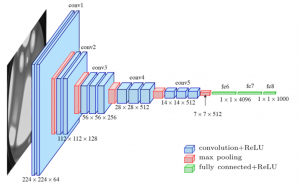

In [8]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # convert to dog or cat.

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [9]:
FIXED_LEARNING_RATE = 1e-4

from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(learning_rate=FIXED_LEARNING_RATE),
              metrics=['acc'])

We pass a generator to model.fit which will yield batches of inputs and targets indefinitely. 

Because the data is being generated endlessly, the Keras model needs to know how many samples to draw from the generator before declaring anepoch over. This is the role of the `steps_per_epoch` argument: after having drawn `steps_per_epoch` batches from the generator—that is, after having run for `steps_per_epoch` gradient descent steps—the fitting process will go to the next epoch. 

In this case, batches are 20 samples, so it will take 100 batches until you see your target of 2,000 samples.

In [10]:
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=10)

Epoch 1/20
100/100 [==============================] - 21s 70ms/step - loss: 0.6890 - acc: 0.5305 - val_loss: 0.6717 - val_acc: 0.6700
Epoch 2/20
100/100 [==============================] - 7s 69ms/step - loss: 0.6681 - acc: 0.5830 - val_loss: 0.6468 - val_acc: 0.6700
Epoch 3/20
100/100 [==============================] - 7s 69ms/step - loss: 0.6525 - acc: 0.6175 - val_loss: 0.6195 - val_acc: 0.6950
Epoch 4/20
100/100 [==============================] - 7s 70ms/step - loss: 0.6261 - acc: 0.6465 - val_loss: 0.6821 - val_acc: 0.5800
Epoch 5/20
100/100 [==============================] - 7s 70ms/step - loss: 0.6069 - acc: 0.6725 - val_loss: 0.5445 - val_acc: 0.7550
Epoch 6/20
100/100 [==============================] - 7s 69ms/step - loss: 0.5718 - acc: 0.6955 - val_loss: 0.5843 - val_acc: 0.7100
Epoch 7/20
100/100 [==============================] - 7s 69ms/step - loss: 0.5538 - acc: 0.7180 - val_loss: 0.5728 - val_acc: 0.6950
Epoch 8/20
100/100 [==============================] - 8s 79ms/step -

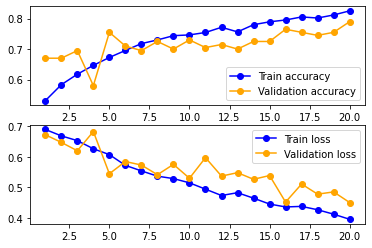

In [11]:
model.save('cats_and_dogs_small_1.h5')

import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.subplot(211)
plt.plot(epochs, acc, '-o', color="blue",label='Train accuracy')
plt.plot(epochs, val_acc, '-o', color="orange", label='Validation accuracy')
plt.legend()

pyplot.subplot(212)

plt.plot(epochs, loss, '-o', color="blue",label='Train loss')
plt.plot(epochs, val_loss, '-o', color="orange", label='Validation loss')
plt.legend()

plt.show()

In [12]:
# Evaluate the model in test and keep these numbers for a final comparison
model_1_test_loss, model_1_test_acc = model.evaluate(test_generator)
model_1_val_acc = max(val_acc) # This is the validation accuracy

40/40 [==============================] - 3s 71ms/step - loss: 0.5389 - acc: 0.7430


# Augment data and use dropout

![alt text](https://camo.githubusercontent.com/ee6fa1073247cd2c3d241300caf110d7a7541bc5/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f3830302f312a4972644a355067684439596f4f7956415137334d4a772e676966)

In [13]:
from keras import layers
from keras import models
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # Dropout!
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [14]:

train_datagen = ImageDataGenerator(rescale=1./255,  #  scale the pixel values to the range of 0-1.
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=50,
                    validation_data=validation_generator,
                    validation_steps=20)

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
100/100 [==============================] - 21s 202ms/step - loss: 0.6948 - acc: 0.4990 - val_loss: 0.6840 - val_acc: 0.5200
Epoch 2/50
100/100 [==============================] - 17s 166ms/step - loss: 0.6881 - acc: 0.5360 - val_loss: 0.6743 - val_acc: 0.5800
Epoch 3/50
100/100 [==============================] - 17s 165ms/step - loss: 0.6727 - acc: 0.5770 - val_loss: 0.6646 - val_acc: 0.5725
Epoch 4/50
100/100 [==============================] - 18s 177ms/step - loss: 0.6726 - acc: 0.5600 - val_loss: 0.6252 - val_acc: 0.6775
Epoch 5/50
100/100 [==============================] - 17s 166ms/step - loss: 0.6623 - acc: 0.5900 - val_loss: 0.6869 - val_acc: 0.5600
Epoch 6/50
100/100 [==============================] - 18s 182ms/step - loss: 0.6503 - acc: 0.6115 - val_loss: 0.6491 - val_acc: 0.6250
Epoch 7/50
100/100 [==============================] - 17s 166ms/step - loss: 0.6472 - acc: 0.6120 - val_lo

# Explore model results

Lets plot the predictions for a couple of samples:

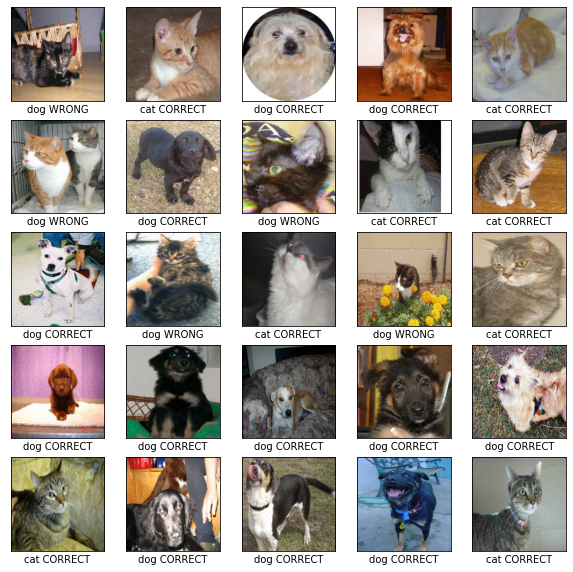

In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,10))
# plot 25 random images from the test set.
first_index = np.random.randint(n_train+n_validation+1, n_train+n_validation+n_test-25)

for i in range(first_index,first_index+25):
    # define subplot
    plt.subplot(5,5,i+1-first_index)

    # random: cat or dog?
    is_dog = np.random.randint(2) # random number between 0 and 1
    if (is_dog): # dog == 1
      label = "dog"
      filename = test_dogs_dir + '/dog.' + str(i) + '.jpg'
    else:
      label = "cat"
      filename = test_cats_dir + '/cat.' + str(i) + '.jpg'

	  # load image pixels
    image = imread(filename)
    image = cv2.resize(image,(150,150))
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    img = np.reshape(image,[1,150,150,3])
    prediction = model(img)
    
    if (prediction):
      predicted_label = "dog"
    else:
      predicted_label = "cat"
    plt.xlabel(predicted_label+" "+("CORRECT" if prediction==is_dog else "WRONG"))
plt.show()

Let's now plot a couple misclassified samples:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


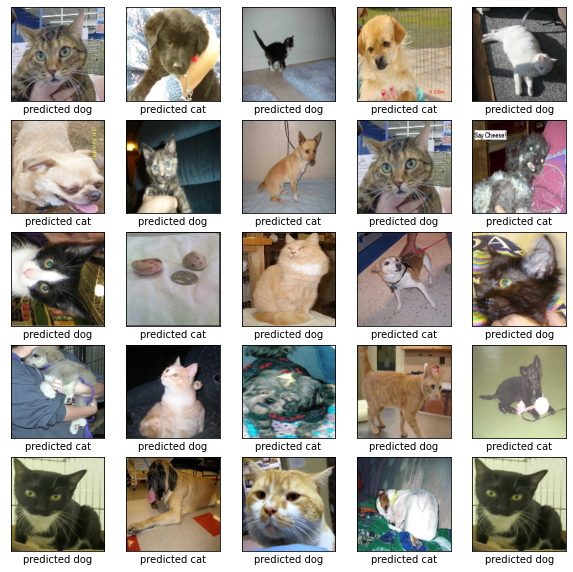

In [18]:

plt.figure(figsize=(10,10))

i=0

while (i<25):

    # get a random index
    index = np.random.randint(n_train+n_validation+1, n_train+n_validation+n_test-1)

    # define subplot
    plt.subplot(5,5,i+1)

    # pick alternatively a cat and a dog
    ground_truth = i%2
    if (ground_truth == 1): # dog == 1
      label = "dog"
      opposite_label = "cat"
      filename = test_dogs_dir + '/dog.' + str(index) + '.jpg'
    else:
      label = "cat"
      opposite_label = "dog"
      filename = test_cats_dir + '/cat.' + str(index) + '.jpg'

	  # load image pixels
    image = imread(filename)
    image = cv2.resize(image,(150,150))

    img = np.reshape(image,[1,150,150,3])
    prediction = model(img)
    if (prediction != ground_truth):
      plt.xlabel( "predicted " + opposite_label )
      i = i+1
      plt.imshow(image)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)

plt.show()

Let's evaluate the model over the test dataset 

In [20]:
#EVALUATE THE MODEL IN TEST
test_loss, test_acc = model.evaluate(test_generator)
print("Test acc is ",test_acc)     # This is the test accuracy
print("Val acc is ", max(val_acc)) # This is the validation accuracy

40/40 [==============================] - 3s 71ms/step - loss: 0.5133 - acc: 0.7450
Test acc is  0.7450000047683716
Val acc is  0.7900000214576721


# The power of adding more data
I have reached a maximum of 74% accuracy so far. One way to get better is to just provide more training data.

I am using only 2000 training samples. The Kaggle dataset provides over 25000 training samples. If we increase this number, so does the accuracy.

The very same architecture used in this file achieves > 95% accuracy if trained in the full training dataset ;)

# Further ideas to improve this model
- Tune the learning rate parameter appropriately
- Explore other architectures
- Use transfer learning over a pre-trained model. In a follow up notebok in this repo I used a VGG16 model pre-trained on Imagenet, and fine tuned it to classify dogs vs cats with 90% accuracy.